# ECS784 Data Analytics Coursework 1

## Supervised Learning: Heart Disease Classification

Dataset provided by [Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

# 1. Data Dictionary

This table provides a description for each of the variables.

| Variable | Description |
| -------- | ----------- |
| Age | Age of the patient in years |
| Sex | Sex of the patient (M or F) |
| ChestPainType | Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] |
| RestingBP | Resting blood pressure [mmHg] |
| Cholesterol | Serum cholesterol [mm/dl] |
| FastingBS | Fasting blood sugar [1 if FastingBS > 120 mg/dl, 0 if otherwise] | 
| RestingECG | Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] |
| MaxHR | Maximum heart rate achieved [Numeric value between 60 and 202] |
| ExerciseAngina | Exercise-induced angina [Y: Yes, N: No] |
| Oldpeak | Oldpeak = ST [Numeric value measured in depression] |
| ST_Slope | The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] |
| HeartDisease | Output class [1: heart disease, 0: Normal] |

# 2. Exploratory Data Analysis

## 2.1 DataFrame Preparation

In [2831]:
# imports all modules needed to read and manipulate the data
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# prevents warnings from happening
import warnings 
warnings.simplefilter('ignore', category=UserWarning)

# makes plots pretty in jupyternotebook
%matplotlib inline

# loads the dataset from the file heart.csv into a DataFrame
df = pd.read_csv('heart.csv')

In [2832]:
# uses df.shape to calculate the number of rows and columns 
print(f"The DataFrame contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# displays the columns and their associated non-null counts, dtypes, and indexes
df.info()

The DataFrame contains 918 rows and 12 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [2833]:
print('The first five rows of the DataFrame are as follows:')

# displays the first five rows of the DataFrame
df.head()

The first five rows of the DataFrame are as follows:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2834]:
print("The following 7 variables are continuous (numerical):\n")

# provides general statistical information about the continuous (numerical) variables in the DataFrame
df.describe()

The following 7 variables are continuous (numerical):



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## 2.2 Categorical (Discrete) Variables

It is worth mentioning that the predicted variable 'HeartDisease' and another feature variable 'FastingBS' are also categorical. However, the dataset already stores the values of these variables as '0' or '1' instead of 'yes' or 'no'. For that reason, they do not show up with the following command.

In [2835]:
print('The following 5 variables are categorical (discrete):\n')

# provides general statistical information about the discrete (categorical) variables in the DataFrame
df.describe(include='object')

The following 5 variables are categorical (discrete):



,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


### Distributions of Categorical Variables

Comparing the bar plots of each variable side-by-side, it is easy to see that none of the variables is equally distributed. For example, the variable 'Sex' contains far more males than females.

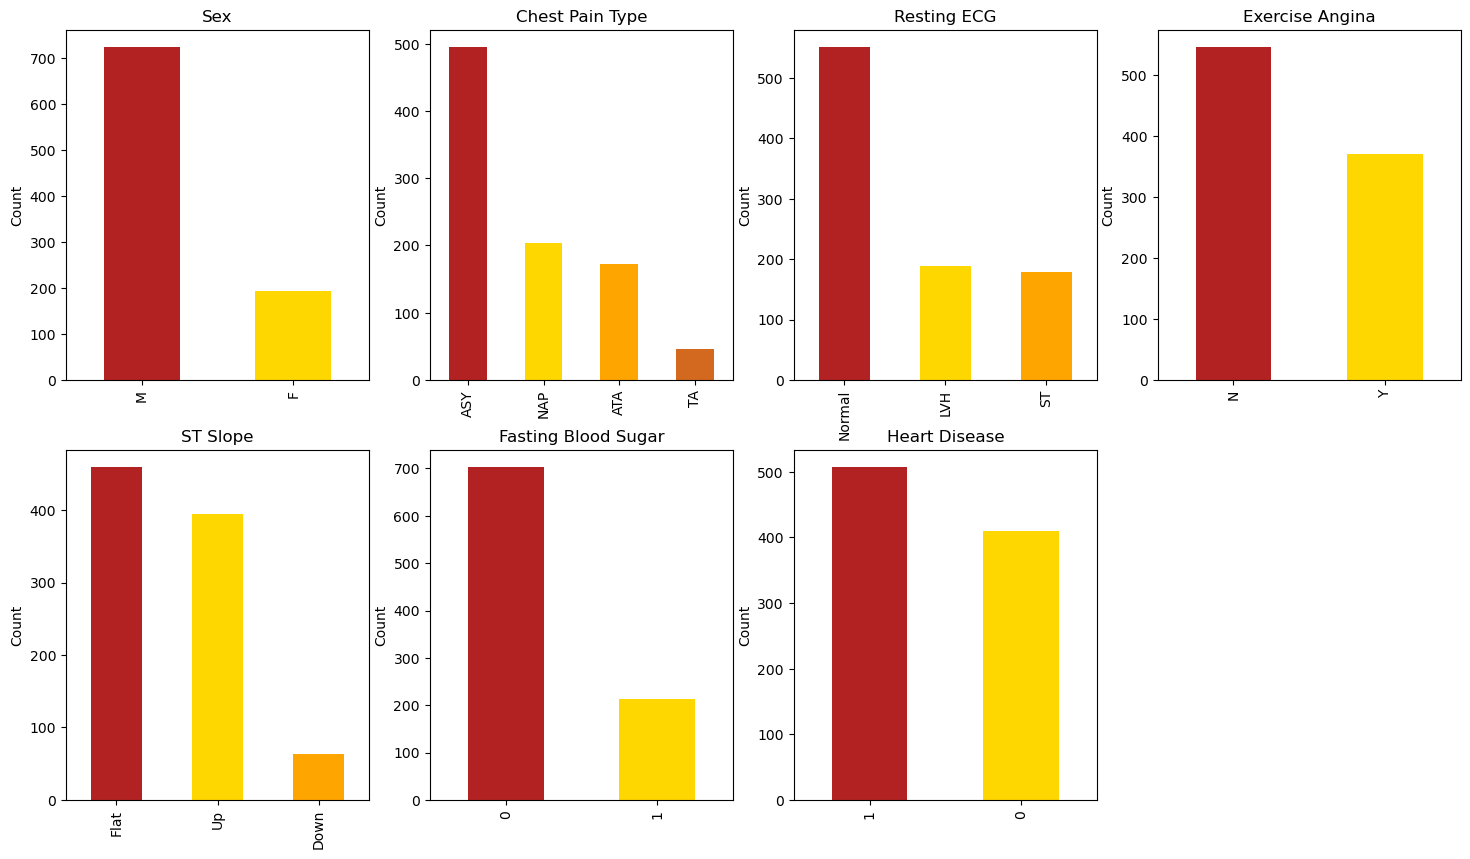

In [2836]:
# creates the figure object that will hold the various subplots 
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (18, 10))

# creates subplots for the value counts of each categorical variable
df['Sex'].value_counts().plot(ax = axes[0, 0], kind = 'bar', title = 'Sex', color = ['firebrick', 'gold'], ylabel = 'Count')
df['ChestPainType'].value_counts().plot(ax = axes[0, 1], kind = 'bar', title = 'Chest Pain Type', color = ['firebrick', 'gold', 'orange', 'chocolate'], ylabel = 'Count')
df['RestingECG'].value_counts().plot(ax = axes[0, 2], kind = 'bar', title = 'Resting ECG', color = ['firebrick', 'gold', 'orange'], ylabel = 'Count')
df['ExerciseAngina'].value_counts().plot(ax = axes[0, 3], kind = 'bar', title = 'Exercise Angina', color = ['firebrick', 'gold'], ylabel = 'Count')
df['ST_Slope'].value_counts().plot(ax = axes[1, 0], kind = 'bar', title = 'ST Slope', color = ['firebrick', 'gold', 'orange'], ylabel = 'Count')
df['FastingBS'].value_counts().plot(ax = axes[1, 1], kind = 'bar', title = 'Fasting Blood Sugar', color = ['firebrick', 'gold'], ylabel = 'Count')
df['HeartDisease'].value_counts().plot(ax = axes[1, 2], kind = 'bar', title = 'Heart Disease', color = ['firebrick', 'gold'], ylabel = 'Count')

# deletes the empty subplots 
fig.delaxes(axes[1, 3])

plt.show()

### Bivariate Analysis of Categorical Variables

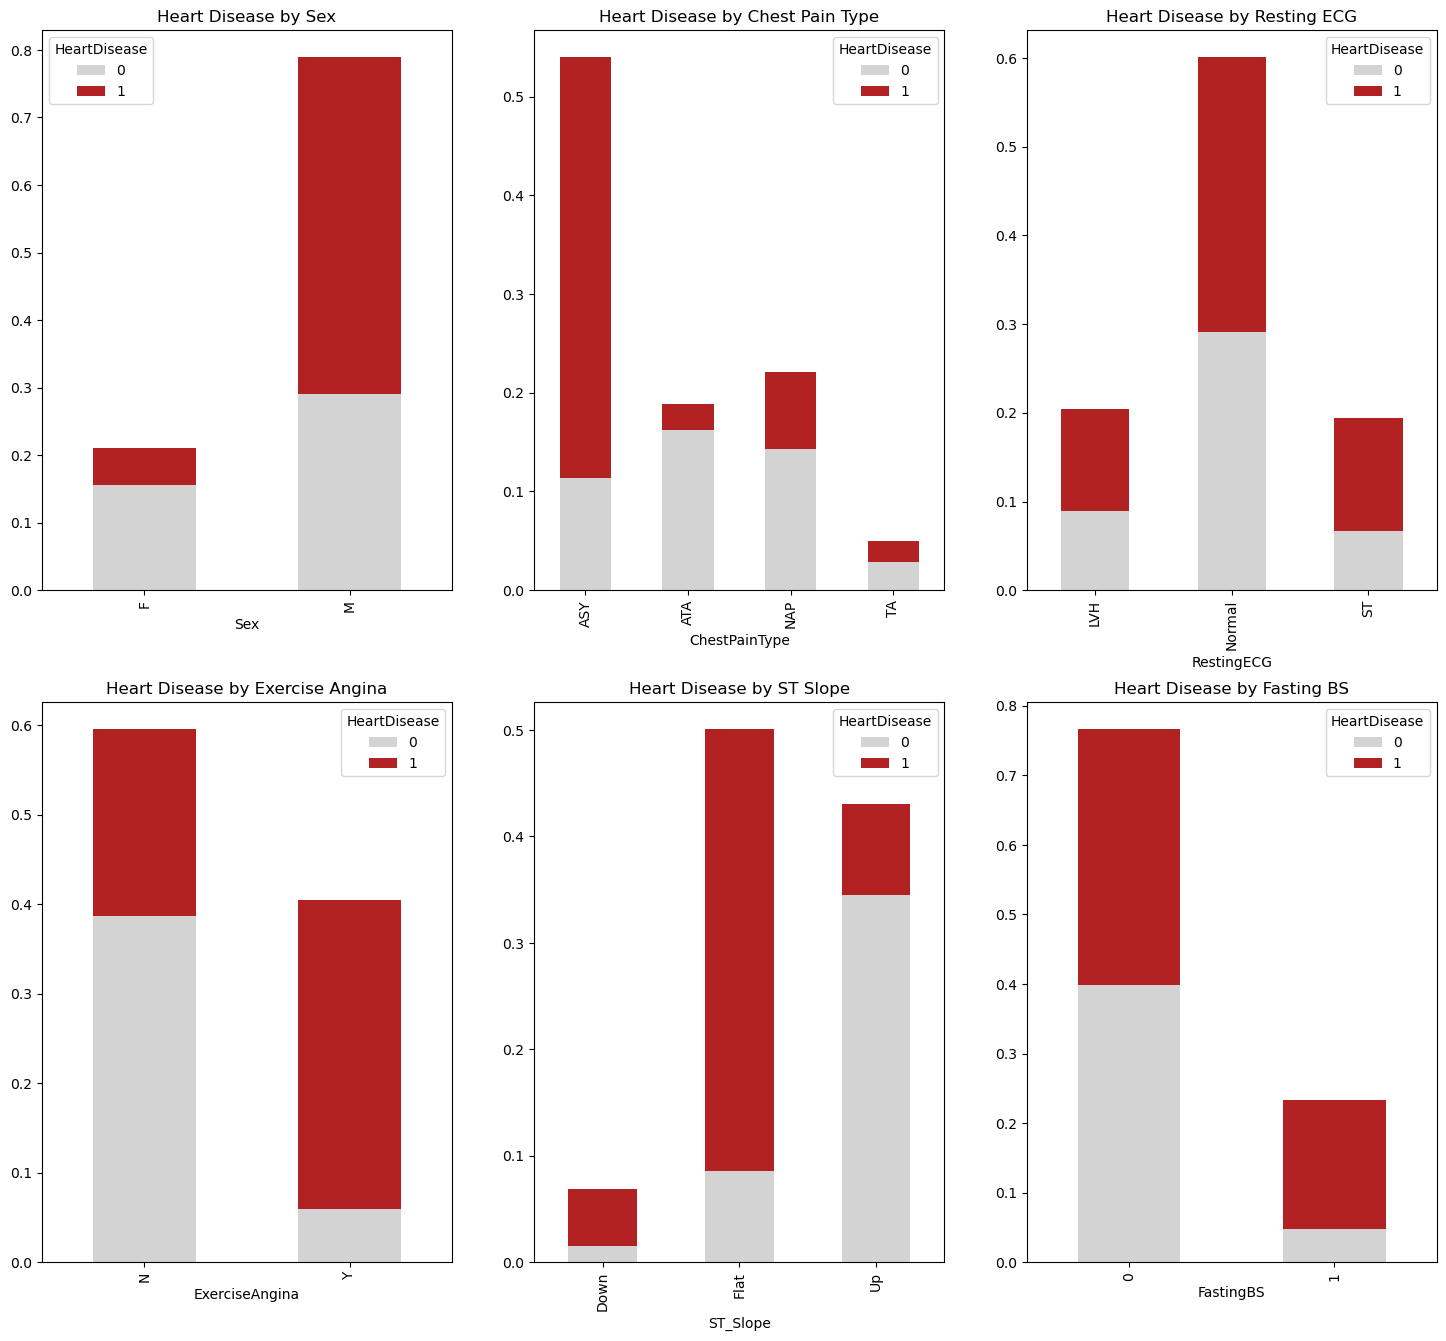

In [2837]:
# creates crosstabulations of each variable with the variable 'HeartDisease'
sex_vs_hd = pd.crosstab(df['Sex'], df['HeartDisease'], normalize = True)
cpt_vs_hd = pd.crosstab(df['ChestPainType'], df['HeartDisease'], normalize = True)
ecg_vs_hd = pd.crosstab(df['RestingECG'], df['HeartDisease'], normalize = True)
ang_vs_hd = pd.crosstab(df['ExerciseAngina'], df['HeartDisease'], normalize = True)
sts_vs_hd = pd.crosstab(df['ST_Slope'], df['HeartDisease'], normalize = True)
fbs_vs_hd = pd.crosstab(df['FastingBS'], df['HeartDisease'], normalize = True)

# creates the figure that will hold the subplots
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (18, 16))

# creates the subplots
sex_vs_hd.plot(ax = axes[0, 0], kind = 'bar', color = ['lightgrey', 'firebrick'], stacked = True, title = 'Heart Disease by Sex')
cpt_vs_hd.plot(ax = axes[0, 1], kind = 'bar', color = ['lightgrey', 'firebrick'], stacked = True, title = 'Heart Disease by Chest Pain Type')
ecg_vs_hd.plot(ax = axes[0, 2], kind = 'bar', color = ['lightgrey', 'firebrick'], stacked = True, title = 'Heart Disease by Resting ECG')
ang_vs_hd.plot(ax = axes[1, 0], kind = 'bar', color = ['lightgrey', 'firebrick'], stacked = True, title = 'Heart Disease by Exercise Angina')
sts_vs_hd.plot(ax = axes[1, 1], kind = 'bar', color = ['lightgrey', 'firebrick'], stacked = True, title = 'Heart Disease by ST Slope')
fbs_vs_hd.plot(ax = axes[1, 2], kind = 'bar', color = ['lightgrey', 'firebrick'], stacked = True, title = 'Heart Disease by Fasting BS')

plt.show()

## 2.3 Numerical (Continuous) Variables

In [2838]:
# displays the continous variables once again
# again, the variables 'HeartDisease' and 'FastingBS' are included here because their (boolean) data is stored numerically
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Distributions of Continuous Variables

#### Histograms

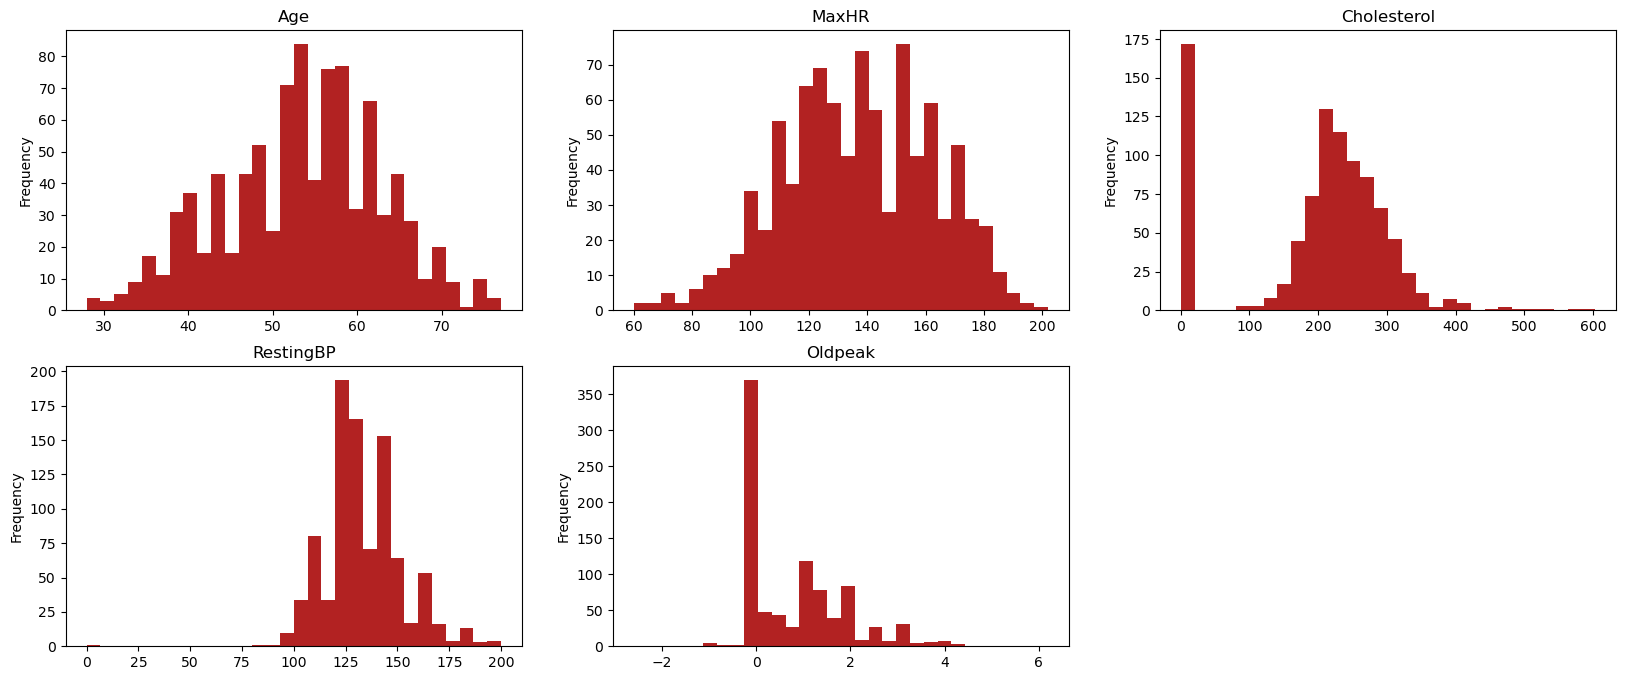

In [2839]:
# creates the figure to hold the subplots 
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,8)) 

# creates the subplots 
df['Age'].plot(kind = 'hist', bins = 30, ax = axes[0, 0], title = 'Age', color = 'firebrick')
df['MaxHR'].plot(kind = 'hist', bins = 30, ax = axes[0, 1], title = 'MaxHR', color = 'firebrick')
df['Cholesterol'].plot(kind = 'hist', bins = 30, ax = axes[0, 2], title = 'Cholesterol', color = 'firebrick')
df['RestingBP'].plot(kind = 'hist', bins = 30, ax = axes[1, 0], title = 'RestingBP', color = 'firebrick')
df['Oldpeak'].plot(kind = 'hist', bins = 30, ax = axes[1, 1], title = 'Oldpeak', color = 'firebrick')

# removes the last subplot 
fig.delaxes(axes[1, 2])

plt.show()

#### Boxplots

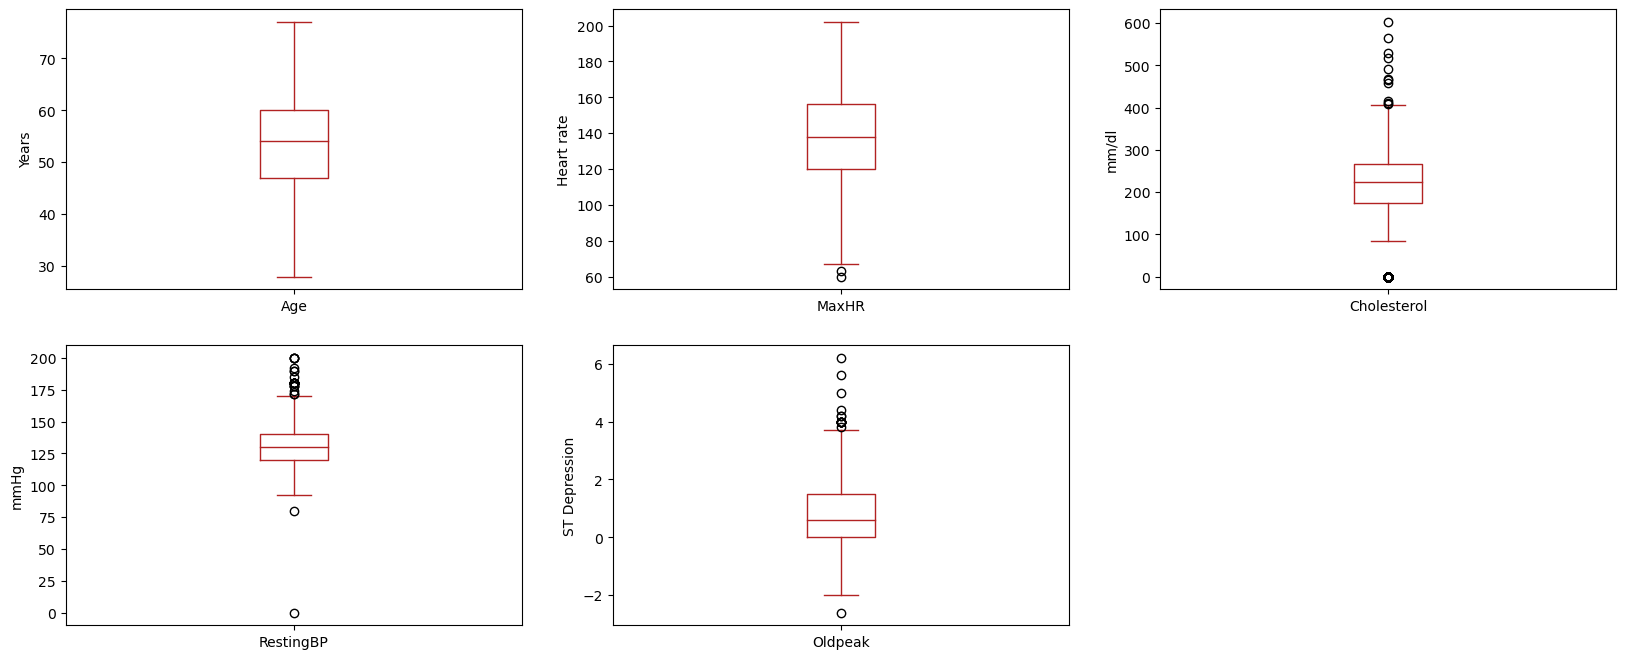

In [2840]:
# creates the figure to hold the subplots 
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 8)) 

# creates the subplots 
df['Age'].plot(kind='box', ax=axes[0, 0], ylabel='Years', color = 'firebrick')
df['MaxHR'].plot(kind='box', ax=axes[0, 1], ylabel='Heart rate', color = 'firebrick')
df['Cholesterol'].plot(kind='box', ax=axes[0, 2], ylabel='mm/dl', color = 'firebrick')
df['RestingBP'].plot(kind='box', ax=axes[1, 0], ylabel='mmHg', color = 'firebrick')
df['Oldpeak'].plot(kind='box', ax=axes[1, 1], ylabel='ST Depression', color = 'firebrick')

# removes the last subplot 
fig.delaxes(axes[1, 2])

plt.show()

#### Density Plots

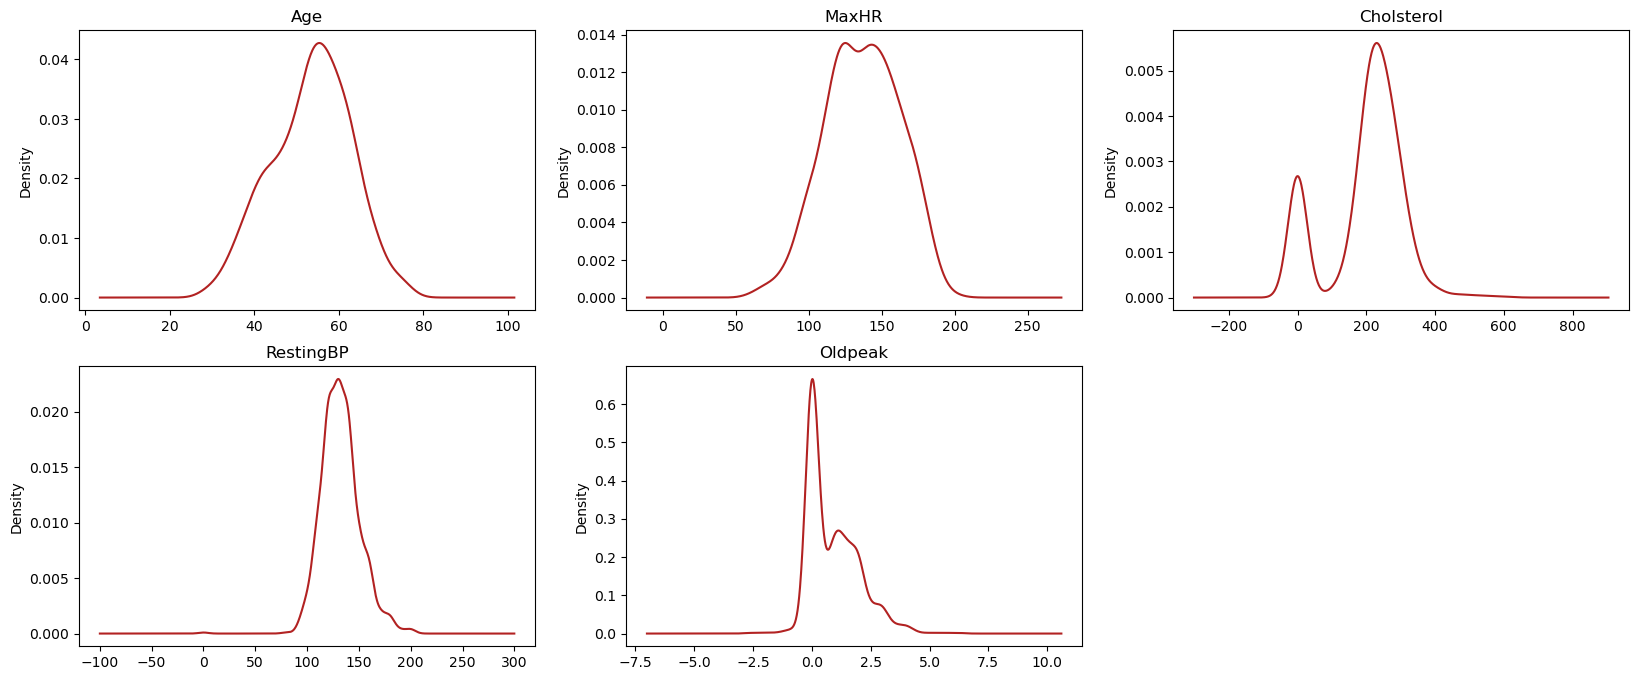

In [2841]:
# creates the figure to hold the subplots 
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 8))

# creates the subplots 
df['Age'].plot(kind='density', color='firebrick', ax=axes[0, 0], title = 'Age')
df['MaxHR'].plot(kind='density', color='firebrick', ax=axes[0, 1], title = 'MaxHR')
df['Cholesterol'].plot(kind='density', color='firebrick', ax=axes[0, 2], title = 'Cholsterol')
df['RestingBP'].plot(kind='density', color='firebrick', ax=axes[1, 0], title = 'RestingBP')
df['Oldpeak'].plot(kind='density', color='firebrick', ax=axes[1, 1], title = 'Oldpeak')

# removes the last subplot 
fig.delaxes(axes[1, 2])

plt.show()

### Bivariate Analysis of Continuous Variables

#### Boxplots

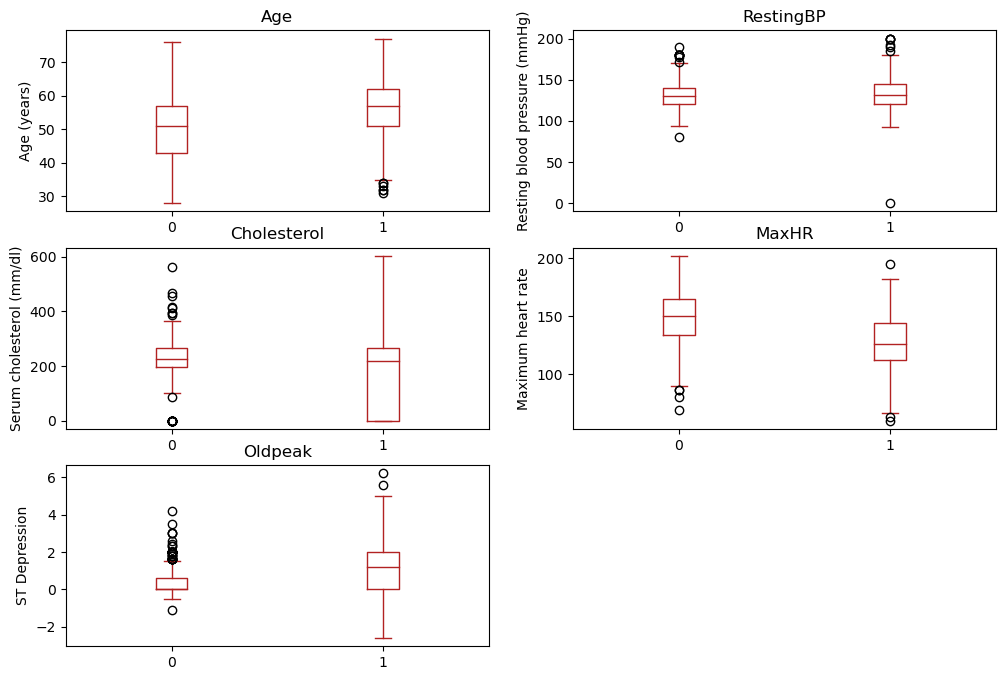

In [2842]:
# creates the figure to hold the subplots 
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 8))

# creates the subplots 
df.plot(ax = axes[0, 0], column = 'Age', by = 'HeartDisease', kind = 'box', ylabel = 'Age (years)', color = 'firebrick')
df.plot(ax = axes[0, 1], column = 'RestingBP', by = 'HeartDisease', kind = 'box', ylabel = 'Resting blood pressure (mmHg)', color = 'firebrick')
df.plot(ax = axes[1, 0], column = 'Cholesterol', by = 'HeartDisease', kind = 'box', ylabel = 'Serum cholesterol (mm/dl)', color = 'firebrick')
df.plot(ax = axes[1, 1], column = 'MaxHR', by = 'HeartDisease', kind = 'box', ylabel = 'Maximum heart rate', color = 'firebrick')
df.plot(ax = axes[2, 0], column = 'Oldpeak', by = 'HeartDisease', kind = 'box', ylabel = 'ST Depression', color = 'firebrick')

# removes the last subplot
fig.delaxes(axes[2,1])

plt.show()

#### Mean Comparison

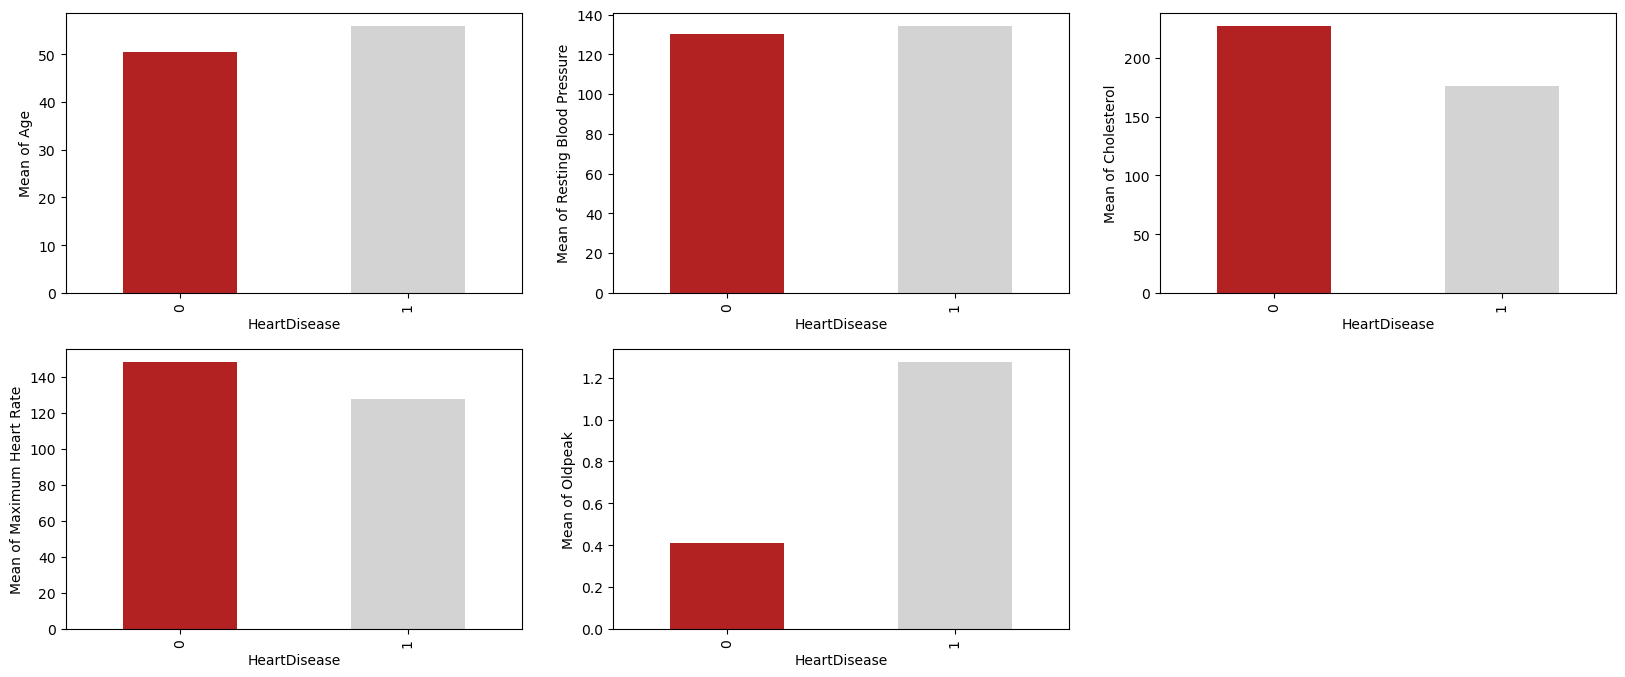

In [2843]:
# creates the figure to hold the subplots 
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 8))

# creates the subplots 
df.groupby('HeartDisease')['Age'].mean().plot(ax = axes[0,0], kind = 'bar', ylabel = 'Mean of Age', color = ['firebrick', 'lightgrey'])
df.groupby('HeartDisease')['RestingBP'].mean().plot(ax = axes[0, 1], kind = 'bar', ylabel = 'Mean of Resting Blood Pressure', color = ['firebrick', 'lightgrey'])
df.groupby('HeartDisease')['Cholesterol'].mean().plot(ax = axes[0, 2], kind = 'bar', ylabel = 'Mean of Cholesterol', color = ['firebrick', 'lightgrey'])
df.groupby('HeartDisease')['MaxHR'].mean().plot(ax = axes[1, 0], kind = 'bar', ylabel = 'Mean of Maximum Heart Rate', color = ['firebrick', 'lightgrey'])
df.groupby('HeartDisease')['Oldpeak'].mean().plot(ax = axes[1, 1], kind = 'bar', ylabel = 'Mean of Oldpeak', color = ['firebrick', 'lightgrey'])

# removes the last subplot 
fig.delaxes(axes[1,2])

plt.show()

# 3. Preprocessing

The creator of the dataset has already removed any null values.

In [2844]:
# checks for null values 
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [2845]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


At this stage, the categorical values are converted to numerical values (1s and 0s) that will be more suitable for the machine learning algorithms.

In [2846]:
# converts each categorical variable 
df['Sex'] = df['Sex'].astype('category').cat.codes
df['ChestPainType'] = df['ChestPainType'].astype('category').cat.codes
df['RestingECG'] = df['RestingECG'].astype('category').cat.codes 
df['ExerciseAngina'] = df['ExerciseAngina'].astype('category').cat.codes 
df['ST_Slope'] = df['ST_Slope'].astype('category').cat.codes

In [2847]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# 4. Feature Selection

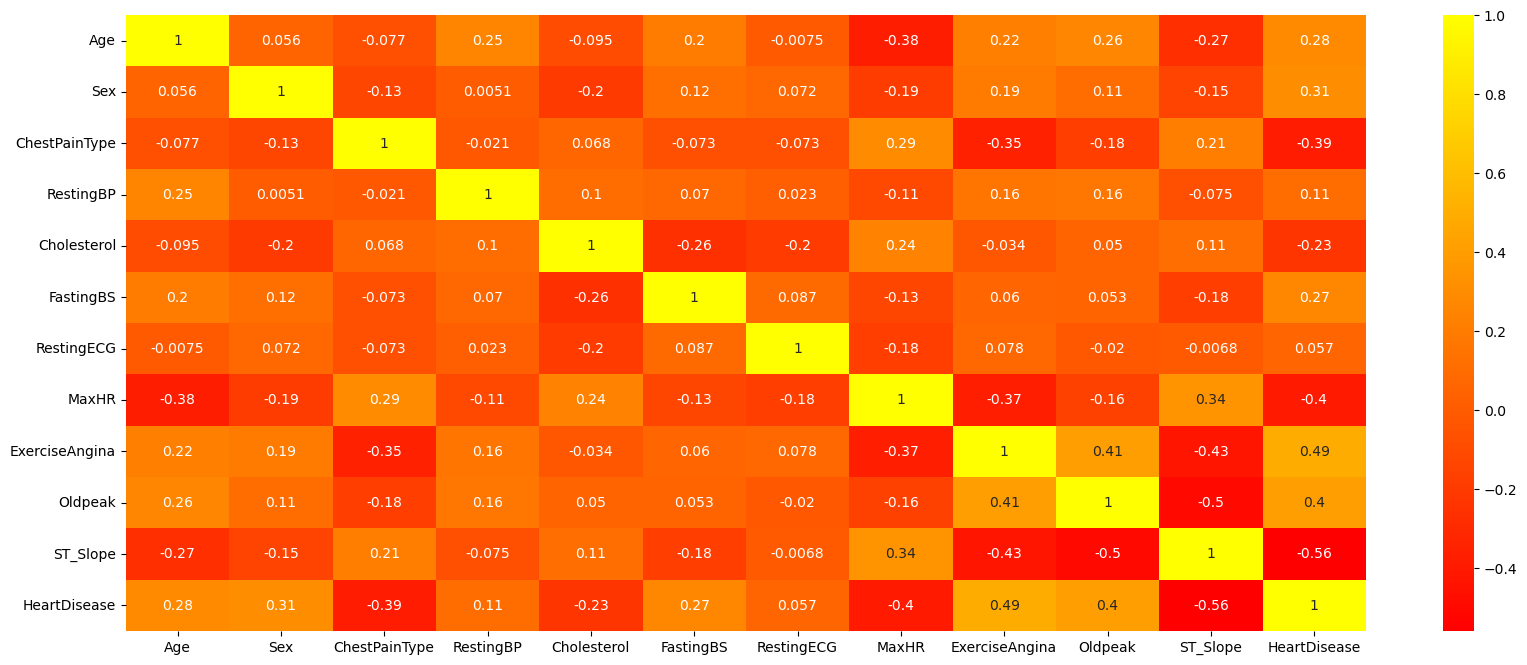

In [2848]:
# creates a correlation
correlation = df.corr()

# creates the figure
plt.figure(figsize = (20,8)) 

# constructs the heatmap
sns.heatmap(correlation, annot = True, cmap = 'autumn')

plt.show()

In [2849]:
# creates a DataFrame object without the variable 'HeartDisease'
X = df.drop(['HeartDisease'], axis=1) 

# creates a Series object with the variable 'HeartDisease'
y = df['HeartDisease']

In [2850]:
# imports modules to use two classification scoring functions that can help with feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from sklearn.ensemble import ExtraTreesClassifier 

# runs f classification test
ftest = SelectKBest(score_func = f_classif, k = 'all').fit(X, y) 
ftest_sorted = pd.Series(data = ftest.scores_, index = X.columns).sort_values() 

# runs mutual info classification test
mitest = SelectKBest(score_func = mutual_info_classif, k = 'all').fit(X, y) 
mitest_sorted = pd.Series(data = mitest.scores_, index = X.columns).sort_values()

# runs extra trees classifier test 
xtrees = ExtraTreesClassifier().fit(X, y) 
xtrees_sorted = pd.Series(data = xtrees.feature_importances_, index = X.columns).sort_values() 

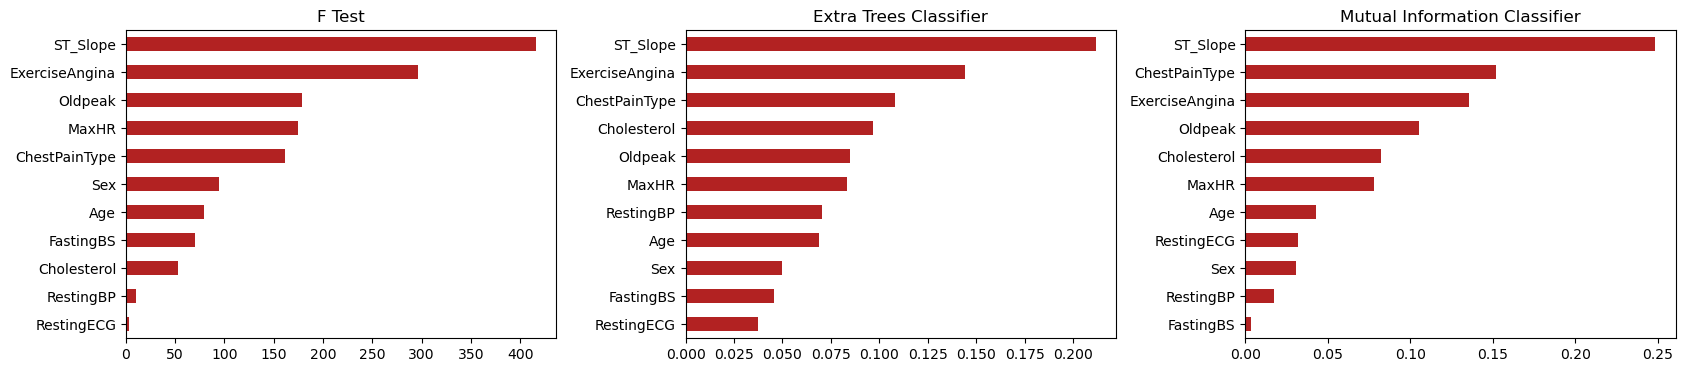

In [2851]:
# creates the figure to hold the subplots 
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 4)) 

# adds space between the subplots 
plt.subplots_adjust(wspace = 0.3) 

# creates the subplots 
ftest_sorted.plot(kind='barh', ax=axes[0], title='F Test', color = 'firebrick')
xtrees_sorted.plot(kind='barh', ax=axes[1], title='Extra Trees Classifier', color = 'firebrick')
mitest_sorted.plot(kind='barh', ax=axes[2], title='Mutual Information Classifier', color = 'firebrick')

plt.show()

Looking at the output above from each scoring method, the variable 'RestingECG' consistently has the lowest score. For this reason, it is dropped.

In [2852]:
X = X.drop(['RestingECG'], axis = 1)

# 5. Prediction and Evaluation

In [2853]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix 
import warnings 
warnings.filterwarnings('ignore', category = FutureWarning)

In [2854]:
def train_eval(model, X, y):

    # prints name of algorithm
    print(f'Results of {model}:')

    # splits the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # computes cross-validation accuracy 
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print('Mean cross-validation accuracy is {:.3f} with SD: {:.3f}'
          .format(np.mean(scores), np.std(scores)))

    # fits model with training data
    learnt_model = model.fit(X_train, y_train)
    print('Accuracy on training data is {:.3f}\n'.format(model.score(X_train, y_train)))
    
    # User predict() to predict target values from test feature variables, and then
    # use functions to compute evaluation metrics relevant to binary outcome variable

    y_pred = model.predict(X_test)
    print('Test data metrics: accuracy={:.3f}, f1={:.3f}, precision={:.3f}, recall={:.3f}'
          .format(accuracy_score(y_true=y_test, y_pred=y_pred),
                  f1_score(y_true=y_test, y_pred=y_pred),
                  precision_score(y_true=y_test, y_pred=y_pred),
                  recall_score(y_true=y_test, y_pred=y_pred)))
    
    # creates confusion matrix 
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    plt.figure(figsize=(2, 2))
    ax = sns.heatmap(cm, annot=True, xticklabels=['N', 'Y'], cbar=False,
                     yticklabels=['N', 'Y'], square=True,
                     linewidths=8.0) # plots the confusion matrix
    ax.set_xlabel('Predicted Heart Disease')
    ax.set_ylabel('Actual Heart Disease')
    plt.show()
    
    return learnt_model

Results of LogisticRegression():
Mean cross-validation accuracy is 0.851 with SD: 0.015
Accuracy on training data is 0.861

Test data metrics: accuracy=0.853, f1=0.868, precision=0.908, recall=0.832


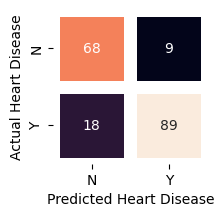

In [2855]:
from sklearn.linear_model import LogisticRegression
_ = train_eval(LogisticRegression(), X, y)

Results of DecisionTreeClassifier():
Mean cross-validation accuracy is 0.790 with SD: 0.033
Accuracy on training data is 1.000

Test data metrics: accuracy=0.799, f1=0.810, precision=0.898, recall=0.738


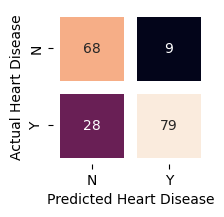

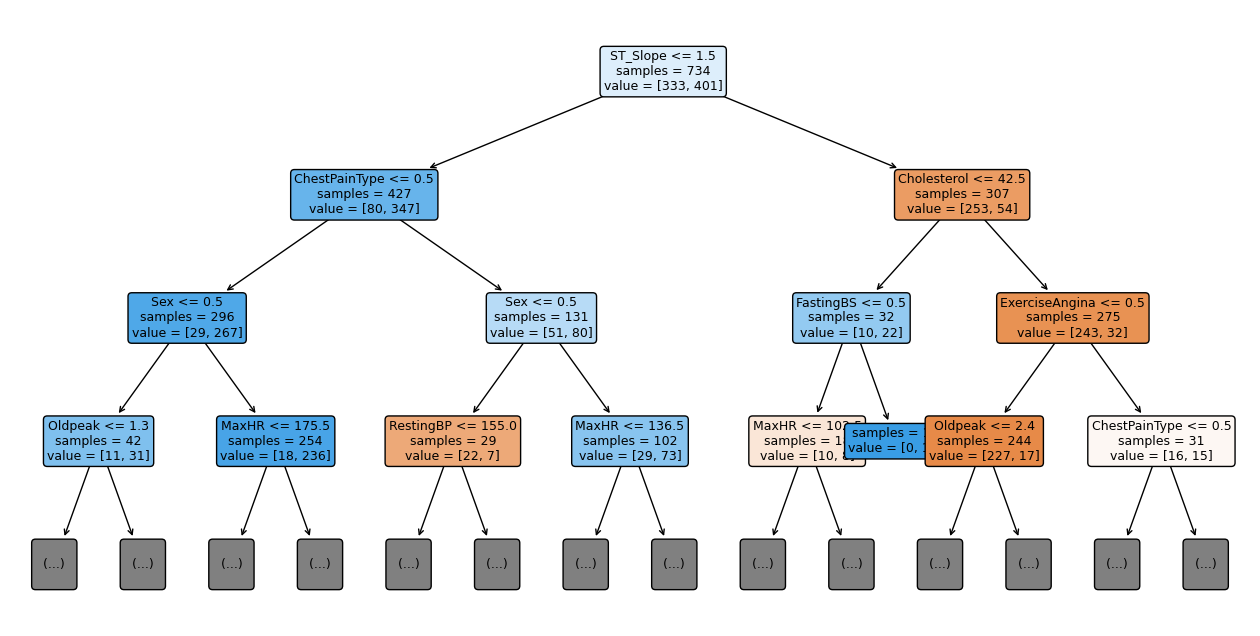

In [2856]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
learnt_model = train_eval(DecisionTreeClassifier(), X, y)
plt.figure(figsize=(16, 8))
plot_tree(learnt_model, max_depth=3, feature_names=X.columns,
          fontsize=9, filled=True, impurity=False, rounded=True)
plt.show()

# 6. PCA

In [2857]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

X = df.drop(['HeartDisease'],axis=1)
y = df['HeartDisease']

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

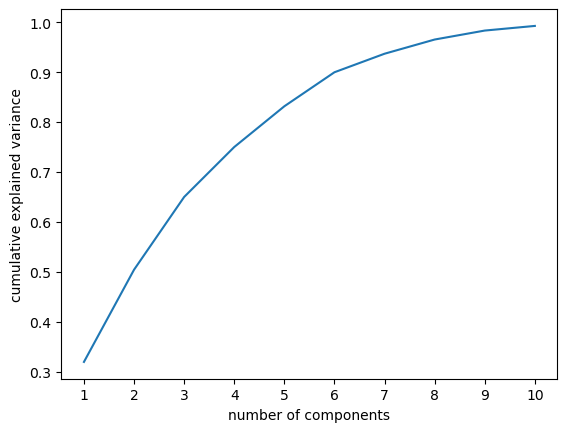

In [2858]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10).fit(X)
plt.plot(range(1,11), np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1,11))  
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()


PCA reduces features from (918, 11) to (918, 6)

Results from algorithm LogisticRegression():
Mean cross-validation accuracy is 0.845 with SD 0.018

Accuracy on training data is 0.849

Test data metrics: accuracy=0.837, f1=0.850, precision=0.914, recall=0.794


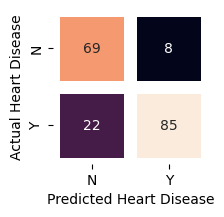

In [2859]:
pca = PCA(n_components=6).fit(X)
X_reduc = pca.transform(X)
print('\nPCA reduces features from {} to {}'.format(X.shape, X_reduc.shape))
learnt_model = train_and_evaluate(LogisticRegression(), X_reduc, y)

Results of DecisionTreeClassifier():
Mean cross-validation accuracy is 0.809 with SD: 0.016
Accuracy on training data is 1.000

Test data metrics: accuracy=0.821, f1=0.837, precision=0.885, recall=0.794


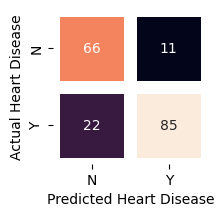

In [2860]:
learnt_model = train_eval(DecisionTreeClassifier(), X_reduc, y)


PCA reduces features from (918, 11) to (918, 7)

Results from algorithm LogisticRegression():
Mean cross-validation accuracy is 0.842 with SD 0.020

Accuracy on training data is 0.851

Test data metrics: accuracy=0.832, f1=0.844, precision=0.913, recall=0.785


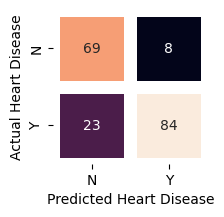

In [2861]:
pca = PCA(n_components=7).fit(X)
X_reduc = pca.transform(X)
print('\nPCA reduces features from {} to {}'.format(X.shape, X_reduc.shape))
learnt_model = train_and_evaluate(LogisticRegression(), X_reduc, y)

Results of DecisionTreeClassifier():
Mean cross-validation accuracy is 0.794 with SD: 0.030
Accuracy on training data is 1.000

Test data metrics: accuracy=0.815, f1=0.825, precision=0.920, recall=0.748


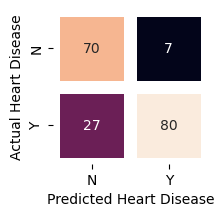

In [2862]:
learnt_model = train_eval(DecisionTreeClassifier(), X_reduc, y)